In [17]:
using CausalForest
using StatsBase
using Plots
using Distributions

Modèle 

$$Y = 10 X_1 + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

Epsilon suit loi normale (0,1).

$n=10^3$ observations

In [18]:
n, m = 10^3, 10
u = Uniform()
features = rand(u, (n, m))
d = Normal()
eps = rand(d, 1000)
labels = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]  .+ eps

model = build_forest_oob(labels, features, 10, 1000, 0.7, 3);

In [19]:
function get_all_nodes_in_tree!(
    tree ,
    result  = []
    )
    if hasproperty(tree, :featid)  
        push!(result, tree.featid)
        get_all_nodes_in_tree!(tree.left, result)
        get_all_nodes_in_tree!(tree.right, result)
    end
    return result
end

get_all_nodes_in_tree! (generic function with 2 methods)

In [20]:
function get_freq(forest) 
    ensemble = forest.trees
    n_trees = length(ensemble)
    res = []
    for i = 1:n_trees
        append!(res, get_all_nodes_in_tree!(forest.trees[i].tree))
    end
    return proportionmap(res)
end

get_freq (generic function with 1 method)

In [21]:
get_freq(model)

Dict{Any, Float64} with 10 entries:
  5  => 0.00142857
  4  => 0.00214286
  6  => 0.00271429
  7  => 0.002
  2  => 0.00114286
  10 => 0.00628571
  9  => 0.001
  8  => 0.00328571
  3  => 0.00242857
  1  => 0.977571

In [22]:
model2 = build_forest_oob(labels, features, 10, 1000, 0.7, 5);

In [23]:
get_freq(model2)

Dict{Any, Float64} with 10 entries:
  5  => 0.07928
  4  => 0.0798983
  6  => 0.0710016
  7  => 0.0675666
  2  => 0.0578456
  10 => 0.0994779
  9  => 0.0658491
  8  => 0.0659865
  3  => 0.0607997
  1  => 0.352295

In [24]:
model3 = build_forest_oob(labels, features, 10, 1000, 0.7, 10);

In [25]:
get_freq(model3)

Dict{Any, Float64} with 10 entries:
  5  => 0.0975483
  4  => 0.0955595
  6  => 0.0933915
  7  => 0.0858697
  2  => 0.0836829
  10 => 0.102346
  9  => 0.0900736
  8  => 0.0913273
  3  => 0.0898474
  1  => 0.170354

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^4$ observations

In [26]:
n, m = 10^4, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, false, true, Y, T, features, true, 10, 1000, 0.7, 0.5, 3);

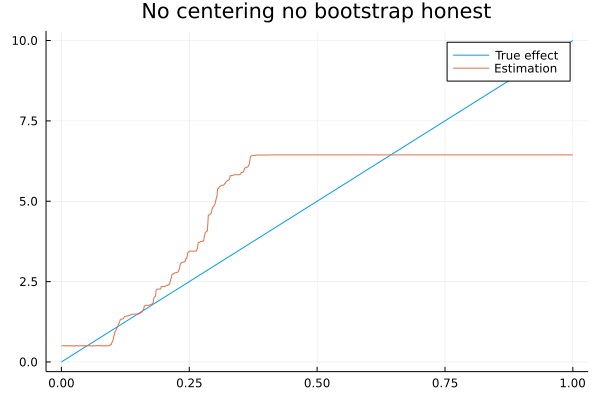

In [27]:
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].*10;
pred1 = apply_forest(cf1, Xtest);
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "No centering no bootstrap honest", fmt = :png)

In [28]:
get_freq(cf1)

Dict{Any, Float64} with 10 entries:
  5  => 0.0556113
  4  => 0.0465816
  6  => 0.0543213
  7  => 0.0526014
  2  => 0.0534614
  10 => 0.0507381
  9  => 0.0376953
  8  => 0.044575
  3  => 0.0569012
  1  => 0.547513

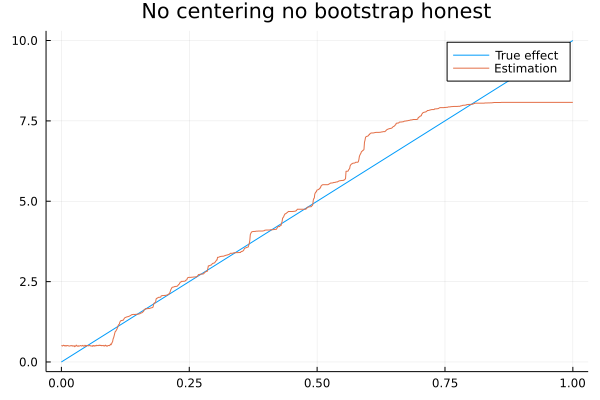

In [29]:
cf2 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 5);
pred2 = apply_forest(cf2, Xtest);
plot(Xtest[:, 1], [true_effect, pred2], label=["True effect" "Estimation"], title = "No centering no bootstrap honest", fmt = :png)

In [30]:
get_freq(cf2)

Dict{Any, Float64} with 10 entries:
  5  => 0.0818005
  4  => 0.0707716
  6  => 0.0832212
  7  => 0.0738373
  2  => 0.07952
  10 => 0.0809406
  9  => 0.0692762
  8  => 0.0769029
  3  => 0.0748467
  1  => 0.308883

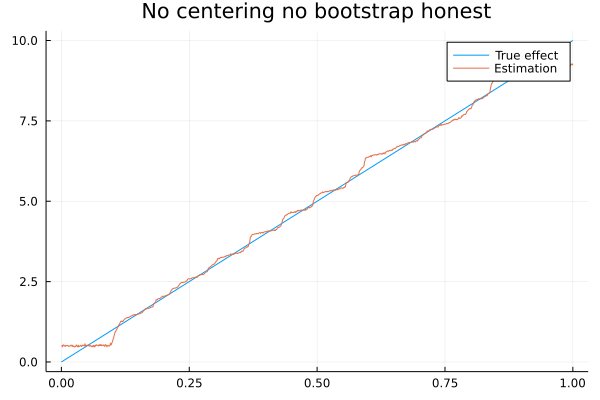

In [31]:
cf3 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 10);
pred3 = apply_forest(cf3, Xtest);
plot(Xtest[:, 1], [true_effect, pred3], label=["True effect" "Estimation"], title = "No centering no bootstrap honest", fmt = :png)

In [32]:
get_freq(cf3)

Dict{Any, Float64} with 10 entries:
  5  => 0.0936664
  4  => 0.0937315
  6  => 0.0955125
  7  => 0.0976959
  2  => 0.093625
  10 => 0.0972285
  9  => 0.0963527
  8  => 0.0950155
  3  => 0.0953114
  1  => 0.141861

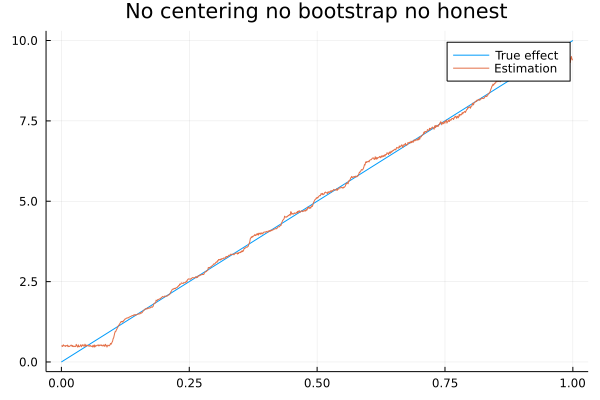

In [33]:
cf4 = build_forest(false, false, true, Y, T, X, true, 10, 1000);
pred4 = apply_forest(cf4, Xtest);
plot(Xtest[:, 1], [true_effect, pred4], label=["True effect" "Estimation"], title = "No centering no bootstrap no honest", fmt = :png)

In [34]:
get_freq(cf4)

Dict{Any, Float64} with 10 entries:
  5  => 0.0959777
  4  => 0.0963059
  6  => 0.0964246
  7  => 0.0980306
  2  => 0.096076
  10 => 0.0977209
  9  => 0.097452
  8  => 0.0963282
  3  => 0.0979453
  1  => 0.127739

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^4$ observations

In [35]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 3);

In [36]:
get_freq(cf1)

Dict{Any, Float64} with 10 entries:
  5  => 0.0608177
  4  => 0.0659101
  6  => 0.0689655
  7  => 0.0549978
  2  => 0.0590717
  10 => 0.0421941
  9  => 0.0648916
  8  => 0.0822057
  3  => 0.0544158
  1  => 0.44653

In [37]:
cf2 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 5);

In [38]:
get_freq(cf2)

Dict{Any, Float64} with 10 entries:
  5  => 0.0830751
  4  => 0.0839606
  6  => 0.0939827
  7  => 0.0794929
  2  => 0.0755082
  10 => 0.0728517
  9  => 0.088388
  8  => 0.0976052
  3  => 0.0761924
  1  => 0.248943

In [39]:
cf3 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 10);

In [40]:
get_freq(cf3)

Dict{Any, Float64} with 10 entries:
  5  => 0.0963376
  4  => 0.101263
  6  => 0.102917
  7  => 0.101184
  2  => 0.0945741
  10 => 0.100612
  9  => 0.101622
  8  => 0.0979003
  3  => 0.0976571
  1  => 0.105933

In [41]:
cf4 = build_forest(false, false, true, Y, T, X, true, 10, 1000);

In [42]:
get_freq(cf4)

Dict{Any, Float64} with 10 entries:
  5  => 0.0970641
  4  => 0.100382
  6  => 0.101537
  7  => 0.100898
  2  => 0.097408
  10 => 0.0995372
  9  => 0.101712
  8  => 0.0993104
  3  => 0.0994366
  1  => 0.102715

$n=10^5$ maintenant

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^5$ observations

In [43]:
n, m = 10^5, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, false, true, Y, T, features, true, 10, 1000, 0.7, 0.5, 3);

In [44]:
get_freq(cf1)

Dict{Any, Float64} with 10 entries:
  5  => 0.0465714
  4  => 0.0538571
  6  => 0.0548571
  7  => 0.0475714
  2  => 0.0371429
  10 => 0.053
  9  => 0.0415714
  8  => 0.0432857
  3  => 0.049
  1  => 0.573143

In [45]:
cf2 = build_forest(false, false, true, Y, T, features, true, 10, 1000, 0.7, 0.5, 5);

In [46]:
get_freq(cf2)

Dict{Any, Float64} with 10 entries:
  5  => 0.0671528
  4  => 0.0705999
  6  => 0.071992
  7  => 0.0688432
  2  => 0.0684455
  10 => 0.0736162
  9  => 0.0706662
  8  => 0.0659596
  3  => 0.0721909
  1  => 0.370534

In [47]:
cf3 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 10);

In [48]:
get_freq(cf3)

Dict{Any, Float64} with 10 entries:
  5  => 0.0981167
  4  => 0.100102
  6  => 0.0999198
  7  => 0.0976372
  2  => 0.10033
  10 => 0.100784
  9  => 0.0974735
  8  => 0.0984603
  3  => 0.09965
  1  => 0.107526

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^5$ observations

In [51]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 3);

In [52]:
get_freq(cf1)

Dict{Any, Float64} with 10 entries:
  5  => 0.0779481
  4  => 0.0551655
  6  => 0.0565984
  7  => 0.0548789
  2  => 0.0663419
  10 => 0.0495773
  9  => 0.0544491
  8  => 0.0601805
  3  => 0.0511535
  1  => 0.473707

In [53]:
cf2 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 5);

In [54]:
get_freq(cf2)

Dict{Any, Float64} with 10 entries:
  5  => 0.085243
  4  => 0.0710845
  6  => 0.0727266
  7  => 0.0673624
  2  => 0.0850241
  10 => 0.0675814
  9  => 0.0714859
  8  => 0.0829076
  3  => 0.0749891
  1  => 0.321595

In [55]:
cf3 = build_forest(false, false, true, Y, T, X, true, 10, 1000, 0.7, 0.5, 10);

In [56]:
get_freq(cf3)

Dict{Any, Float64} with 10 entries:
  5  => 0.102066
  4  => 0.100092
  6  => 0.0992271
  7  => 0.0977648
  2  => 0.104693
  10 => 0.103194
  9  => 0.0990659
  8  => 0.10275
  3  => 0.102302
  1  => 0.0888463